# Importing the necessary libraries

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from matplotlib import pyplot

# Reading the csv file

In [2]:
# reading the csv file

df = pd.read_csv("data/dermatology_data.data")

# We tried to insert the columns directly into the csv file in our local host, but when opened the file in excel, the excel is filling the unknown or empty cellswith zeros(0). So we are expilcitly coding the columns in the code.

In [3]:
#columns

df.columns = ['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'Class Code']

In [4]:
df.describe

<bound method NDFrame.describe of      erythema  scaling  definite borders  itching  koebner phenomenon  \
0           3        3                 3        2                   1   
1           2        1                 2        3                   1   
2           2        2                 2        0                   0   
3           2        3                 2        2                   2   
4           2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
360         2        1                 1        0                   1   
361         3        2                 1        0                   1   
362         3        2                 2        2                   3   
363         2        1                 3        1                   2   
364         3        2                 2        0                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
0                

In [5]:
df.dtypes

erythema                                     int64
scaling                                      int64
definite borders                             int64
itching                                      int64
koebner phenomenon                           int64
polygonal papules                            int64
follicular papules                           int64
oral mucosal involvement                     int64
knee and elbow involvement                   int64
scalp involvement                            int64
family history                               int64
melanin incontinence                         int64
eosinophils in the infiltrate                int64
PNL infiltrate                               int64
fibrosis of the papillary dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing of the rete ridges    

# Correlation Matrix

In [6]:
# preparing the correlation matrix

print(df.corr())

                                          erythema   scaling  \
erythema                                  1.000000  0.435607   
scaling                                   0.435607  1.000000   
definite borders                          0.260654  0.360846   
itching                                  -0.047353 -0.085602   
koebner phenomenon                        0.000498 -0.010024   
polygonal papules                         0.033449 -0.074691   
follicular papules                       -0.109647 -0.092188   
oral mucosal involvement                 -0.026946 -0.082639   
knee and elbow involvement                0.141151  0.298182   
scalp involvement                         0.186609  0.302209   
family history                            0.171989  0.181852   
melanin incontinence                      0.042008 -0.074514   
eosinophils in the infiltrate             0.075146  0.042494   
PNL infiltrate                            0.224048  0.283231   
fibrosis of the papillary dermis        

# Plotting the correlation matrix

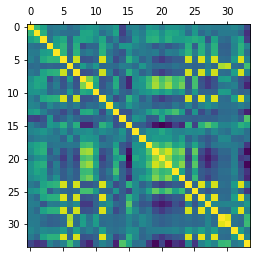

In [7]:
plt.matshow(df.corr()) # Source : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html
plt.show()

# Plotting the correlation matrix as a heat map.

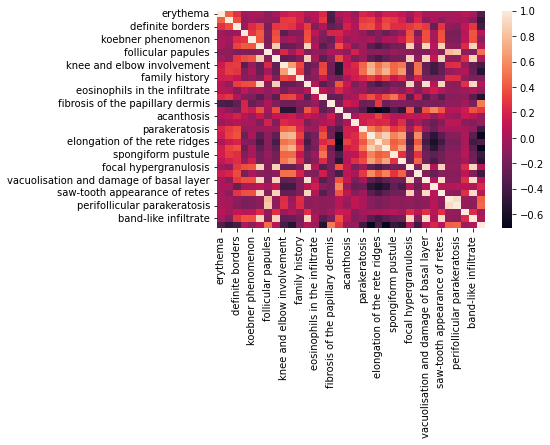

In [8]:
seaborn.heatmap(df.corr()) # Source : https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.savefig("plots/Correlation Matrix.png")

# Data Cleaning

## In the data source of the dataset (https://archive.ics.uci.edu/ml/datasets/Dermatology) itself      they provided that there are 8 missing values in 'Age' attribute.
## This data is part of an intensive research project. So, there nay not be a lot of missing data.

## We cannot afford to delete the rows where there are missing values and we cannot fill the        unknown values with mean or median or mode.
## So, we decided to train a linear regression model with a newdataset and predicted the               missing values.
## The newdataset was formed by dropping the rows where there are missing 'Age' values.

In [9]:
# Data Cleaning

"""
Link to the source of data : https://archive.ics.uci.edu/ml/datasets/Dermatology
In the resource itself they provided that there are 8 missing values in Age attribute.
This data is part of an intensive reasearch project.
So there may not be a lot of missing data.
"""

"""
Here I am using regression and I am training the model with all the attributes except 'Age'.
"""

df_copy = df.copy(deep=True) # Source : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

list_of_indexes = []  # to strore the indexes where the data is '?'
count = 0 

for i in range(len(df_copy)):
    if(df_copy['Age'][i]=='?'):
        count = count + 1
        list_of_indexes.append(i)

print(count)
print(list_of_indexes)

8
[32, 33, 34, 35, 261, 262, 263, 264]


In [10]:
# finding the rows where there is missing data

df_copy[df_copy['Age'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class Code
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
35,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
261,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
262,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
263,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
264,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [11]:
# dropping the columns from the deep copy of the df to train the model

for i in range(len(df_copy)):
    if(df_copy['Age'][i]=='?'):
        df_copy.drop(i, axis=0, inplace=True)

In [12]:
# ensuring the data was cleaned

df_copy[df_copy['Age'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class Code


In [13]:
x = df_copy.drop('Age', axis=1) # x -> dataframe without 'Age' attribute
y = df_copy['Age'] # y -> dataframe with just the 'Age' attribute

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Source : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression(fit_intercept=True) # defining the linear regression model
model.fit(x,y) # training the model with the cleaned data

LinearRegression()

### Note : In the below code we are pushing the data into the dataframe, the code gives a warning (Not error).
### Code is working fine, we are checking weather the code worked or not in the following cell.
### In the following cell we are predicting the values and pushing it into the dataframe.

In [14]:
x_df = df.drop('Age', axis=1).values.reshape(-1,1)
y_df = df['Age']


#predicted_values = model.predict(x_df)

list_of_predicted_values = []

for idx, row in df[df["Age"] == "?"].iterrows():
    x = df.iloc[idx, list(range(33))+[34]]
    age = int (model.predict([x])[0])
    list_of_predicted_values.append([idx, age])
    df.iloc[idx, 33] = age

/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/dheeraj/.local/lib/python3.8/site-packages/sklearn/bas

### Code worked fine and generated the results

In [15]:
list_of_predicted_values # Predicted values by the model along with the row numbers

[[32, 38],
 [33, 34],
 [34, 36],
 [35, 34],
 [261, 37],
 [262, 40],
 [263, 39],
 [264, 36]]

## The dataset consists of different set of attributes (Clinical and Histopathological)

### Selecting the clinical data attributes and creating a clinical dataframe

In [16]:
# The data consists of different set of attributes
# One is clinical attributes and second is histopathological attributes

# Selecting the clinical data attributes and creating the clinical dataframe

clinical_df = df[['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'Age']]

### Selecting the histopathological data attributes and creating a histopathalogical dataframe

In [17]:
# Selecting the histopathological data attributes and creating the histopathological dataframe

histopathological_df = df[['melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate']]

In [18]:
clinical_df.describe

<bound method NDFrame.describe of      erythema  scaling  definite borders  itching  koebner phenomenon  \
0           3        3                 3        2                   1   
1           2        1                 2        3                   1   
2           2        2                 2        0                   0   
3           2        3                 2        2                   2   
4           2        3                 2        0                   0   
..        ...      ...               ...      ...                 ...   
360         2        1                 1        0                   1   
361         3        2                 1        0                   1   
362         3        2                 2        2                   3   
363         2        1                 3        1                   2   
364         3        2                 2        0                   0   

     polygonal papules  follicular papules  oral mucosal involvement  \
0                

In [19]:
histopathological_df.describe

<bound method NDFrame.describe of      melanin incontinence  eosinophils in the infiltrate  PNL infiltrate  \
0                       0                              0               1   
1                       1                              0               0   
2                       0                              0               3   
3                       1                              0               0   
4                       0                              2               1   
..                    ...                            ...             ...   
360                     0                              0               1   
361                     0                              0               0   
362                     2                              2               0   
363                     2                              0               0   
364                     0                              0               1   

     fibrosis of the papillary dermis  exocytosis  ac

## Isolating the class code

### Class code is something we want to predict.
### But the class code is already provided.
### We want to isolate the data so that we can verify the ouput data.

In [20]:
# Class code is something we want to predict
# But the class code is already provided 
# We want to isolate the data so that we can vrify the output data.

class_code = df['Class Code']

In [21]:
class_code.describe

<bound method NDFrame.describe of 0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: Class Code, Length: 365, dtype: int64>

## We are using Logistic Regression, Random Forest Classifier and Linear Support Vector            Machines for our analysis (Using all attributes)

In [22]:
# We are initializing the lists to store accuracy scores using all attributes, clinical attributes, histopathological attributes

accuracy_scores_all_attributes = list()
accuracy_scores_clinical_attributes = list()
accuracy_scores_histopathological_attributes = list()
models_used = ['Logistic Regression', 'Random Forest Classifier', 'Linear Support Vector Machine']

In [23]:
# Spliting the dataset into training data and testing data

x =  df.drop('Class Code', axis=1)
y = df['Class Code']

# Source : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.2)

### Below is the code to implement Logistic Regression
### We are preparing a pipeline with StandardScaler

In [24]:
# Preparing the standardScaler to scale the training dataset
scaler = preprocessing.StandardScaler()

# Here instead of scaling and then feeding it to the model, we prepared a pipeline with a StandardScaler and LogisticRegression
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Training the model with sclaled data (The pipeline can be verified by the below model generated)
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [25]:
# Predicting the results
y_pred = pipe.predict(x_test)

accuracy_scores_all_attributes.append(accuracy_score(y_test, y_pred))

# Accuracy score
accuracy_score(y_test, y_pred)

0.9726027397260274

### Below is the code for implementation of RandomForest Classifier

In [26]:
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#:~:text=A%20random%20forest%20classifier.,accuracy%20and%20control%20over%2Dfitting.
randomForestClassifier = RandomForestClassifier()

# Training the model
randomForestClassifier.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
# Predicting the results
y_pred = randomForestClassifier.predict(x_test)

accuracy_scores_all_attributes.append(accuracy_score(y_test, y_pred))
# Accuracy Score
accuracy_score(y_test, y_pred)

0.9657534246575342

### Plotting the top 10 important features when Random Forest Classifier was used
### (When trianed with all the attributes)

<AxesSubplot:>

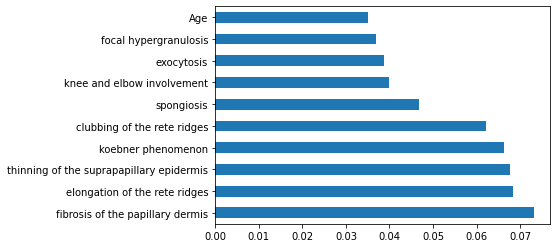

In [28]:
# Source : https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html
(pd.Series(randomForestClassifier.feature_importances_, index=x.columns)).nlargest(10).plot(kind='barh')

### Below is the code for implementation of Linear Support Vector Machine

In [29]:
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
linear_svm = svm.SVC(kernel = 'linear')

# Training the linear SVM
linear_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [30]:
# Predicting the results
y_pred = linear_svm.predict(x_test)

accuracy_scores_all_attributes.append(accuracy_score(y_test, y_pred))
# Accuracy Scores
accuracy_score(y_test, y_pred)

0.952054794520548

### Plotting the top 10 important features when Linear SVM were used
### (When trianed with all the attributes)

<AxesSubplot:>

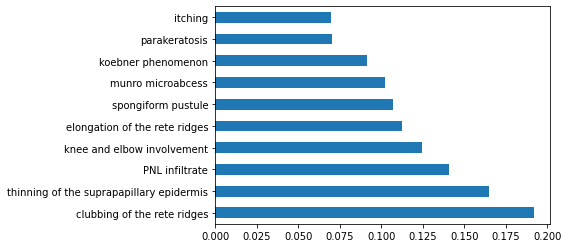

In [31]:
# Getting the important features
# Source : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
importance = linear_svm.coef_[0]

(pd.Series(importance, index=x.columns)).nlargest(10).plot(kind='barh')

In [32]:
# pipe : model for logistic regression
# randomForestClassifier : model for random forest classifier
# linear_svm : model for support vector machine

## We are using Logistic Regression, Random Forest Classifier and Linear Support Vector            Machines for our analysis (Using Clinical attributes)

In [33]:
x = clinical_df
y = class_code

# Splitting the data into testing and training data.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.2)

In [34]:
# Traing the LogisticRegression Model with Scaled data
pipe.fit(x_train, y_train)

# Predicting the results
y_pred = pipe.predict(x_test)

# Accuracy Score
accuracy_scores_clinical_attributes.append(accuracy_score(y_test, y_pred))
print("Accuracy of pipe : ", accuracy_score(y_test, y_pred))

Accuracy of pipe :  0.815068493150685


In [35]:
# Training the Random Forest Classifier
randomForestClassifier.fit(x_train, y_train)

# Predicting the results
y_pred = randomForestClassifier.predict(x_test)

# Accuracy Score
accuracy_scores_clinical_attributes.append(accuracy_score(y_test, y_pred))
print("Accuracy of random forest classifier : ", accuracy_score(y_test, y_pred))

Accuracy of random forest classifier :  0.791095890410959


<AxesSubplot:>

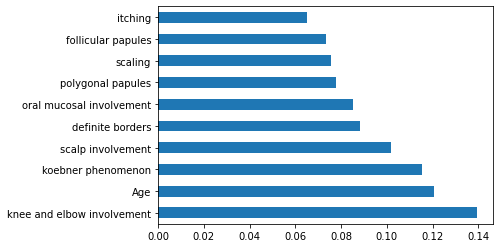

In [36]:
# Plotting the 10 most important features when RandomForestClassifier is used (Clinical Attributes)
(pd.Series(randomForestClassifier.feature_importances_, index=x.columns)).nlargest(10).plot(kind='barh')

In [37]:
# Training the Linear SVM model
linear_svm.fit(x_train, y_train)

# Predicitng the results
y_pred = linear_svm.predict(x_test)

# Accuracy Score
accuracy_scores_clinical_attributes.append(accuracy_score(y_test, y_pred))
print("Accuracy of linear svm : ", accuracy_score(y_test, y_pred))

Accuracy of linear svm :  0.773972602739726


<AxesSubplot:>

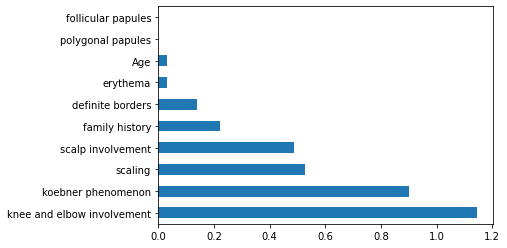

In [38]:
# Imprtant Features
importance = linear_svm.coef_[0]

# Plotting the 10 most important features when Lineat SVM used (Clinical Attributes)
(pd.Series(importance, index=x.columns)).nlargest(10).plot(kind='barh')

## We are using Logistic Regression, Random Forest Classifier and Linear Support Vector            Machines for our analysis (Using Histopathological attributes)

In [39]:
x = histopathological_df
y = class_code

# Splitting the data into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.2)

In [40]:
# Training the Logistic Regression model with sclaled data
pipe.fit(x_train, y_train)

# Predicting the results
y_pred = pipe.predict(x_test)

# Accuracy Score
accuracy_scores_histopathological_attributes.append(accuracy_score(y_test, y_pred))
print("Accuracy of pipe : ", accuracy_score(y_test, y_pred))

Accuracy of pipe :  0.934931506849315


In [41]:
# Training the Random Forest Classifier
randomForestClassifier.fit(x_train, y_train)

# Predicting the results
y_pred = randomForestClassifier.predict(x_test)

# Accuracy Score
accuracy_scores_histopathological_attributes.append(accuracy_score(y_test, y_pred))
print("Accuracy of random forest classifier : ", accuracy_score(y_test, y_pred))

Accuracy of random forest classifier :  0.928082191780822


<AxesSubplot:>

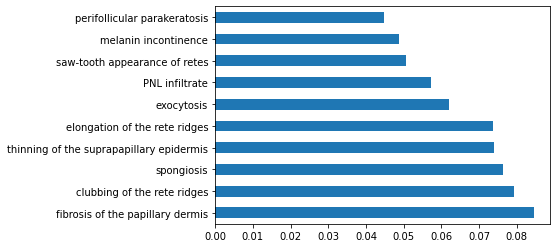

In [42]:
# Plotting the 10 most important features (Random Forest Classifier) (Histopathologcal attributes)
(pd.Series(randomForestClassifier.feature_importances_, index=x.columns)).nlargest(10).plot(kind='barh')

In [43]:
# Training the Linear SVM model
linear_svm.fit(x_train, y_train)

# Predicting the results
y_pred = linear_svm.predict(x_test)

# Accuracy Score
accuracy_scores_histopathological_attributes.append(accuracy_score(y_test, y_pred))
print("Accuracy of linear svm : ", accuracy_score(y_test, y_pred))

Accuracy of linear svm :  0.9246575342465754


<AxesSubplot:>

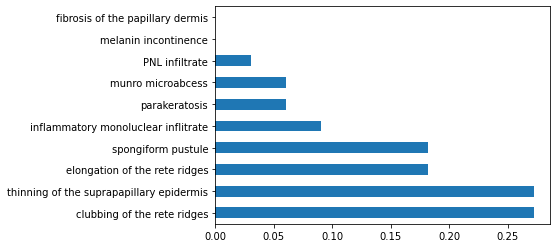

In [44]:
# Important features
importance = linear_svm.coef_[0]

# Plotting the 10 most important features
(pd.Series(importance, index=x.columns)).nlargest(10).plot(kind='barh')

In [45]:
print(models_used)
print(accuracy_scores_all_attributes)
print(accuracy_scores_clinical_attributes)
print(accuracy_scores_histopathological_attributes)

['Logistic Regression', 'Random Forest Classifier', 'Linear Support Vector Machine']
[0.9726027397260274, 0.9657534246575342, 0.952054794520548]
[0.815068493150685, 0.791095890410959, 0.773972602739726]
[0.934931506849315, 0.928082191780822, 0.9246575342465754]


## Plotting the accuracy score of the models when all attributes used, clinical attributes used,      histopathological attributes used.

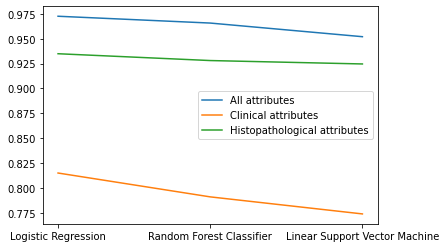

In [46]:
plt.plot(models_used, accuracy_scores_all_attributes, label='All attributes')
plt.plot(models_used, accuracy_scores_clinical_attributes, label='Clinical attributes')
plt.plot(models_used, accuracy_scores_histopathological_attributes, label='Histopathological attributes')
plt.legend()

In [47]:
df.to_csv('cleaned_dataframe.csv', index = False)